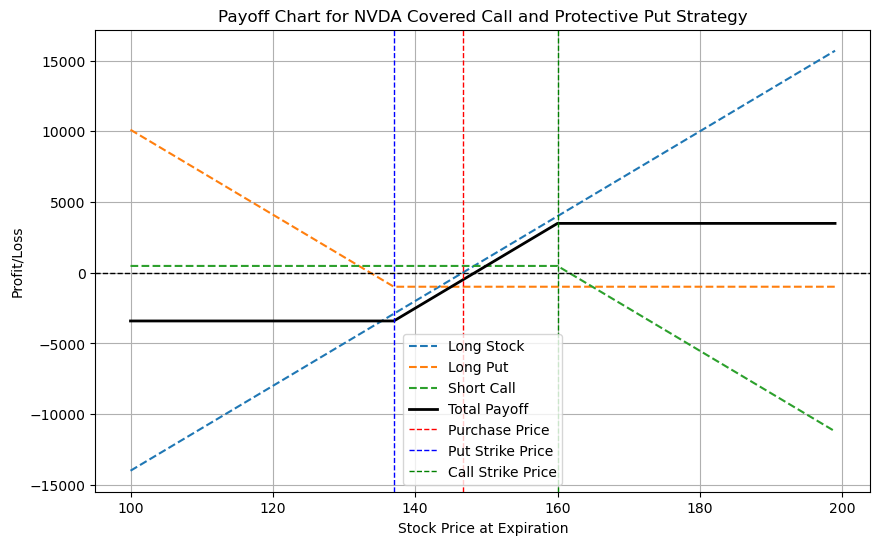



Maximum Profit:  3489.0005493164062
Maximum Loss:  -3410.9994506835938


In [13]:
## The code updates the price of NVDA from YFinance
## the program was built to chart protective Put and Covered Call strategy before earnings

import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Fetch the latest NVDA stock price
stock = yf.Ticker("NVDA")
latest_data = stock.history(period="1d") 
stock_price = latest_data['Close'].iloc[-1]

# Parameters
shares = 300
put_strike = 137
put_premium = 3.30
call_strike = 160
call_premium = 1.60
stock_prices = np.arange(100, 200, 1)

# Long Stock Payoff
long_stock = (stock_prices - stock_price) * shares

# Long Put Payoff
long_put = (np.maximum(put_strike - stock_prices, 0) - put_premium) * shares

# Short Call Payoff
short_call = (np.minimum(call_strike - stock_prices, 0) + call_premium) * shares

# Total Payoff
total_payoff = long_stock + long_put + short_call

# Plotting the payoff chart
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, long_stock, label='Long Stock', linestyle='--')
plt.plot(stock_prices, long_put, label='Long Put', linestyle='--')
plt.plot(stock_prices, short_call, label='Short Call', linestyle='--')
plt.plot(stock_prices, total_payoff, label='Total Payoff', linewidth=2, color='black')

plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(stock_price, color='red', linewidth=1, linestyle='--', label='Purchase Price')
plt.axvline(put_strike, color='blue', linewidth=1, linestyle='--', label='Put Strike Price')
plt.axvline(call_strike, color='green', linewidth=1, linestyle='--', label='Call Strike Price')

plt.title('Payoff Chart for NVDA Covered Call and Protective Put Strategy')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Profit/Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Maximum Profit and Maximum Loss 
max_profit = np.max(total_payoff) 
max_loss = np.min(total_payoff) 
print('\n\nMaximum Profit: ', max_profit) 
print('Maximum Loss: ', max_loss)
